To import all the required libraries. Numpy for mathematical computing, pandas for data analyzing, matplotlib & seaborn for plotting and visualization of data.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Loading and Reading the dataset from the csv file.

In [4]:
ad_df = pd.read_csv('advertising.csv')
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


To check if there are any null values and to obtain the information of each column like average, min, max etc..

In [5]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


To have a better understanding of the features' interdependence, use the correlation matrix.

<ipython-input-28-c3db46074157>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(ad_df.corr(),


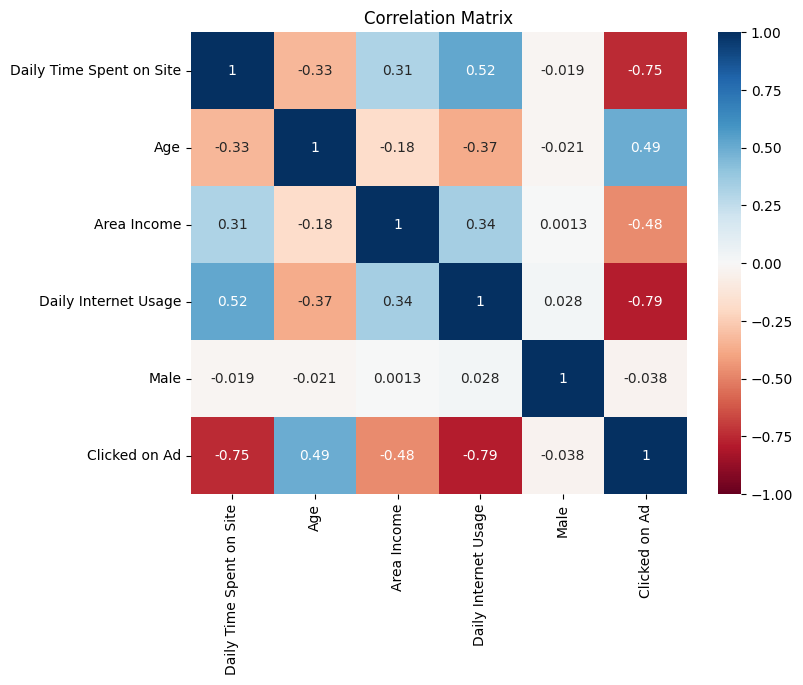

In [28]:
plt.figure(figsize=(8, 6))
s = sns.heatmap(ad_df.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

Using seaborn, create statical graphs between the features that have the most impact on the output.

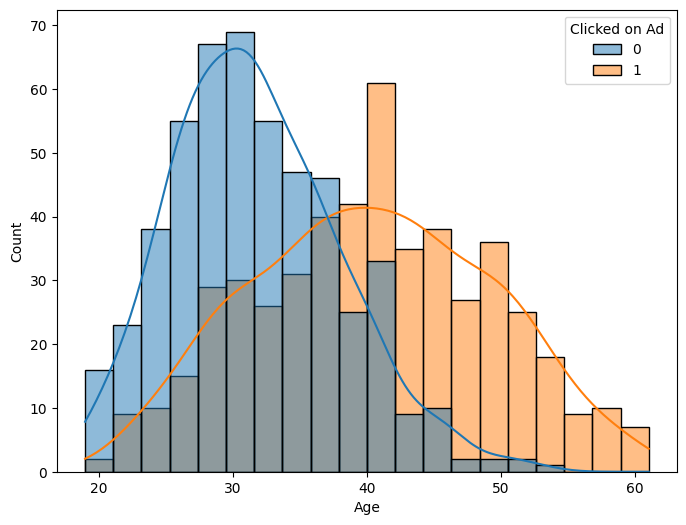

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=ad_df, x='Age', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

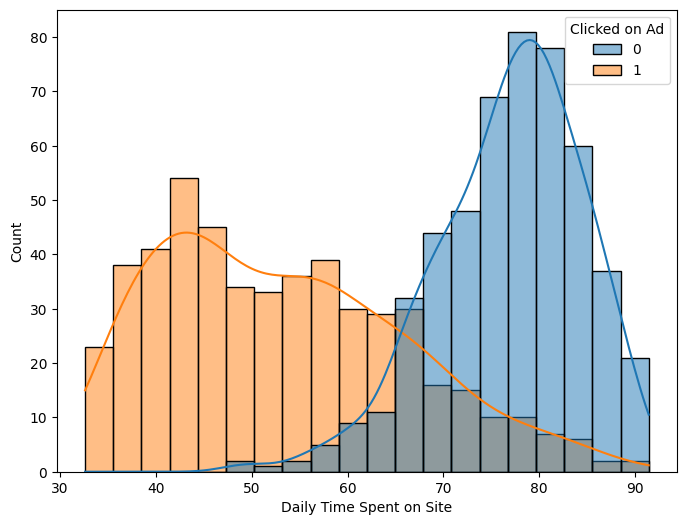

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data=ad_df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

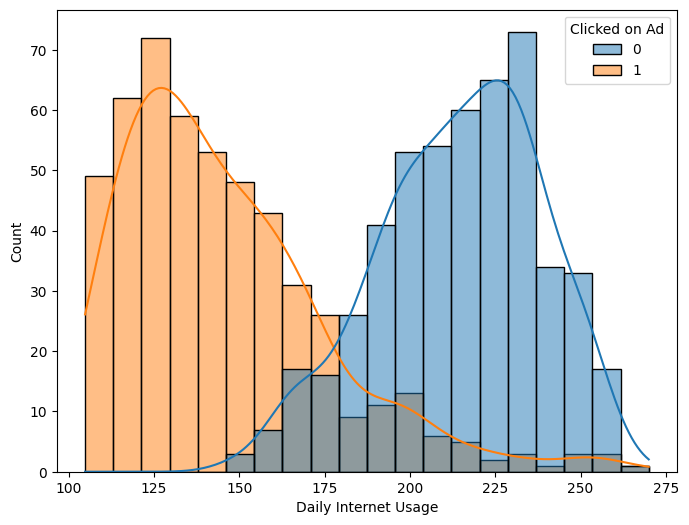

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=ad_df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

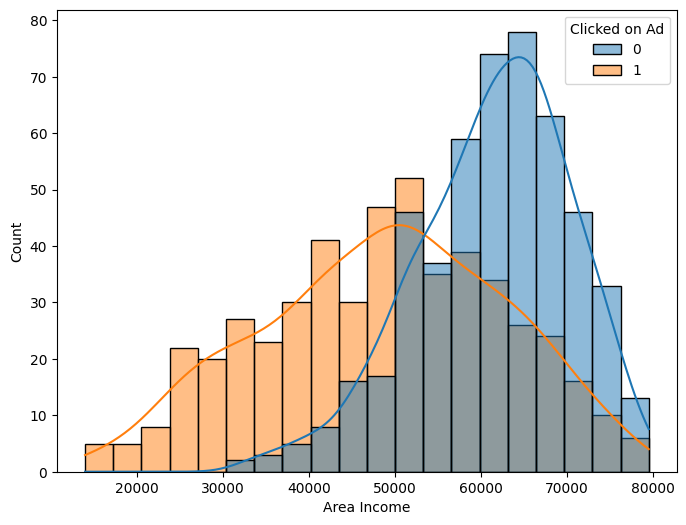

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(data=ad_df, x='Area Income', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

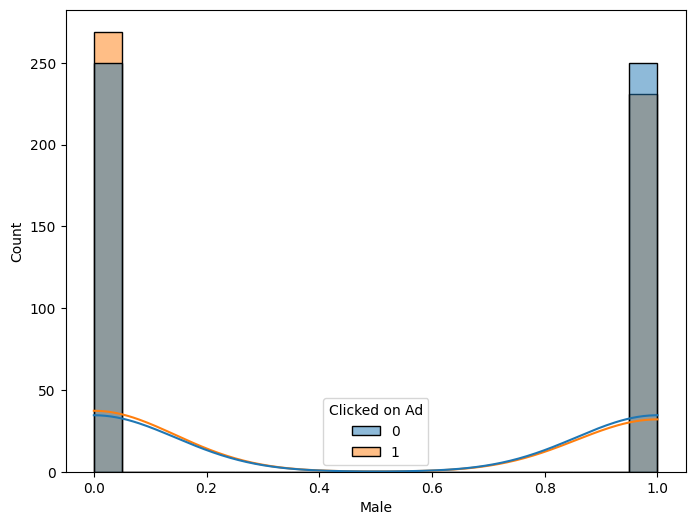

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data=ad_df, x='Male', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

Dropping non-sensitive columns and separating the dataset into random training and test subsets using the train_test_split function from scikit-learn, which we imported. The model should then be built and trained using logistic regression.

In [32]:
X = ad_df.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)
y = ad_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state = 42)
lr_model = LogisticRegression(solver='lbfgs', max_iter=100)
lr_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
lr_predict = lr_model.predict(X_test)
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



Printing the accuracy of our model by comparing it with the y_test.

In [14]:
print(accuracy_score(lr_predict, y_test)*100)

90.0


Giving the model a dictionary as input and asking it to estimate whether or not the user will click on the ad. If the model predicts that the user will click on the ad, the output will be 1, else it will be 0.

In [15]:
customer_data = {
    'Daily Time Spent on Site': 68.0,
    'Age': 49,
    'Area Income': 29000.94,
    'Daily Internet Usage': 143.81,
    'Male': 1
}
customer_df = pd.DataFrame([customer_data])
prediction = lr_model.predict(customer_df)
print(prediction)
if prediction[0] == 1:
    print("The customer is predicted to click on the ad.")
else:
    print("The customer is predicted not to click on the ad.")


[1]
The customer is predicted to click on the ad.
